<a href="https://colab.research.google.com/github/cjfghk5697/CS231n/blob/main/Lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS231N lecture note
**An image classifier** <br>
no obvious way to hard-code the algorithm for recognizing a cat, or other classes. Because everything is made up of many factors. For example, A cat has different feacture with other cats. Like color, age, stripe etc. So, How do computer recgonize a cat?

In [ ]:
def classify_image(image):
  #Some magic here?
  return class_label

**Data-Driven Approach**<br>


1.   Collect a dataset of images and labels
2.   Use Machine Learning to train a classifer
3.   Evaluate the classifier on new images

In [ ]:
def train(images, labels): #Memorize all data and labels (simple)
  #Machine learning!
  return model

def predict(model, test_images): #Predict the lable of the most similar trainig image(similar too, but hard Data-Driven)
  #Use model to predict labels
  return test_labels

**Q:With N examples, how fast are training and prediction?**
<br>A:Train O(1), predictO(N)
<br>
This is bad: we want classifiers that aew fast at prediction; slow for training is ok

<h1>Nearest Neaighbor Classifier</h1>
This has not relation with CNN. And it is rarely used but it will allow us to get some idea. 

**Example Image Classification Dataset: CIFAR-10**
<br>[CIFAR-10 ](https://www.cs.toronto.edu/~kriz/cifar.html)<br>
This dataset popular in image classification. We will  use this dataset. If you want to know more. Go to the Link.

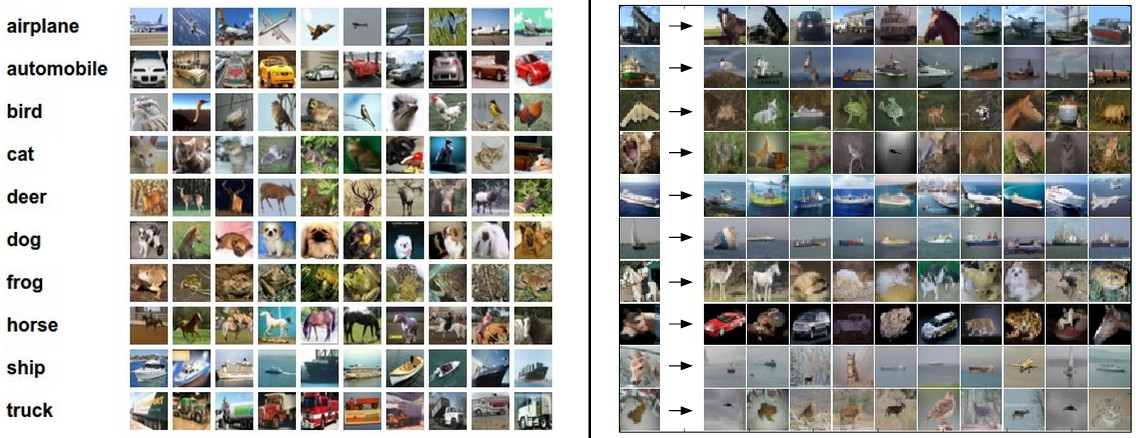

Left: CIFAR-10 datasets Right: Nearest neighbors in the training.
<Br>
The hores classification is wrong. Because A red car enters the horse row instead. Why this happen? We had used L1 distance.
<br>
First, let’s load the CIFAR-10 data into memory as 4 arrays: the training data/labels and the test data/labels. In the code below, Xtr (of size 50,000 x 32 x 32 x 3) holds all the images in the training set, and a corresponding 1-dimensional array Ytr (of length 50,000) holds the training labels (from 0 to 9):

**Distance Metric to compare images** <br>
L1 distances: d1(I1,I2)=∑p|Ip1−Ip2|


It is really simple. This kind of stupid. but it does some reasonable things sometimes.

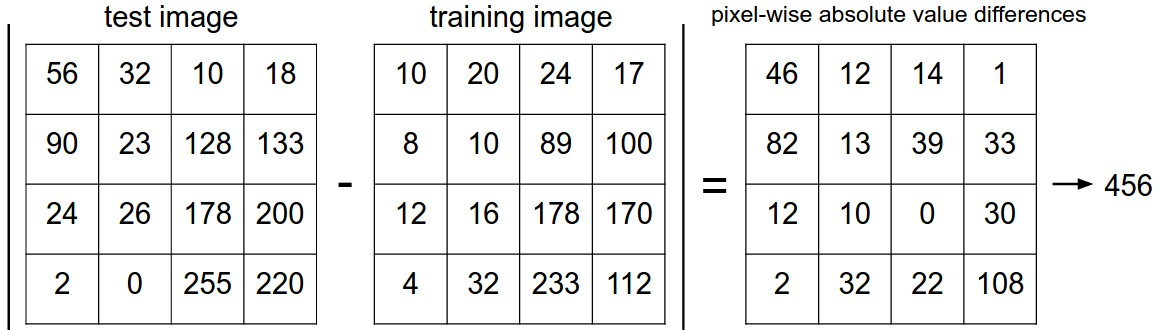

In [ ]:
Xtr, Ytr, Xte, Yte = load_CIFAR10('data/cifar10/') # a magic function we provide
# flatten out all images to be one-dimensional
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows becomes 10000 x 3072

We stretched all images. And now we could evaluate and train classifier.

In [ ]:
nn = NearestNeighbor() # create a Nearest Neighbor classifier class
nn.train(Xtr_rows, Ytr) # train the classifier on the training images and labels
Yte_predict = nn.predict(Xte_rows) # predict labels on the test images
# and now print the classification accuracy, which is the average number
# of examples that are correctly predicted (i.e. label matches)
print 'accuracy: %f' % ( np.mean(Yte_predict == Yte) )

Notice that Evaluation criterion is accuracy. It is common to use the accuracy.

<br>
API:They have a train(x,y) that takes the labels and the data to learn from. 
Here is an implementation of a simple Nearest Neighbor classifier with the L1 distance that satisfies this template:

In [ ]:
import numpy as np

class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X #there's not really much to do here.
    self.ytr = y

  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test): 
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
      distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
      min_index = np.argmin(distances) # get the index with smallest distance
      Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

If you ran this code, you would see that this classifire achieves 38.6%. Now people achieves 95%(Using CNN). And we use another ways of computing distances that called L2. <br>
<br>

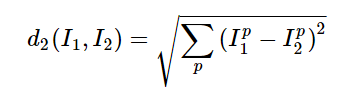

It is Euclidean distance. We can code this formula.

In [ ]:
distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))


But It is not better than L1. It has just slightly difference about accurancy(35.4%). In particular, the L2 distance is much more unforgiving than the L1 distance when it comes to differences between two vectors. That is, the L2 distance prefers many medium disagreements to one big one. L1 and L2 distances (or equivalently the L1/L2 norms of the differences between a pair of images) are the most commonly used special cases of a p-norm.

<h1>k - Nearest Neighbor Classifier</h1>
K-Nearest Neighbor Classifier is better way than L1 and L2. KNN is very simple.Instead finding the single closet image in the training set, we will find the top k closet images and have them vote on the label of the test image. In particular, when k = 1, we recover the Nearest Neighbor classifier. Intuitively, higher values of k have a smoothing effect that makes the classifier more resistant to outliers:  

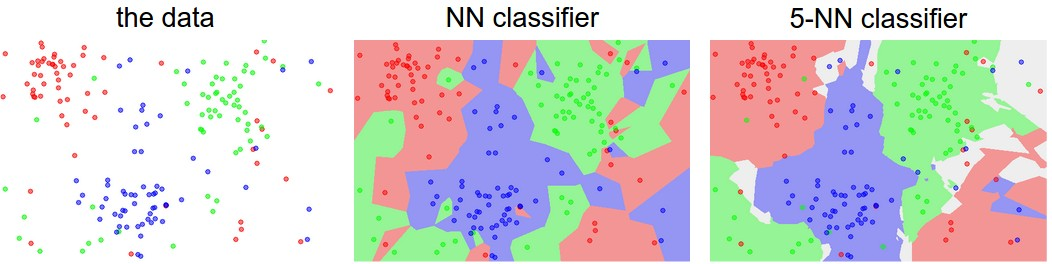

How we value K? We turn out of this problem.

<h1>Validation sets for Hyperparameter tuning</h1>
What number works best? And we have to consider so many distances. These choices are called hyperparameters and they come up very often in the design of many Machine Learning algorithms that learn from data. It’s often not obvious what values/settings one should choose.  <br>
We attempted to suggest that try to adjust data and value because it looks like best way. But it is very carefully. In particular, we cannot use the test set for the purpose of tweaking hyperparameters.  But if you only use the test set once at end, it remains a good proxy for measuring the generalization of your classifier (we will see much more discussion surrounding generalization later in the class).

Luckily, there is a correct way of tuning the hyperparameters and it does not touch the test set at all. The idea is to split our training set in two: a slightly smaller training set, and what we call a validation set. Using CIFAR-10 as an example, we could for example use 49,000 of the training images for training, and leave 1,000 aside for validation. This validation set is essentially used as a fake test set to tune the hyper-parameters.

In [ ]:
# assume we have Xtr_rows, Ytr, Xte_rows, Yte as before
# recall Xtr_rows is 50,000 x 3072 matrix
Xval_rows = Xtr_rows[:1000, :] # take first 1000 for validation
Yval = Ytr[:1000]
Xtr_rows = Xtr_rows[1000:, :] # keep last 49,000 for train
Ytr = Ytr[1000:]

# find hyperparameters that work best on the validation set
validation_accuracies = []
for k in [1, 3, 5, 10, 20, 50, 100]:

  # use a particular value of k and evaluation on validation data
  nn = NearestNeighbor()
  nn.train(Xtr_rows, Ytr)
  # here we assume a modified NearestNeighbor class that can take a k as input
  Yval_predict = nn.predict(Xval_rows, k = k)
  acc = np.mean(Yval_predict == Yval)
  print 'accuracy: %f' % (acc,)

  # keep track of what works on the validation set
  validation_accuracies.append((k, acc))

**Cross-Validation**
We want more sophisticated technique for hyperparameter tuning.

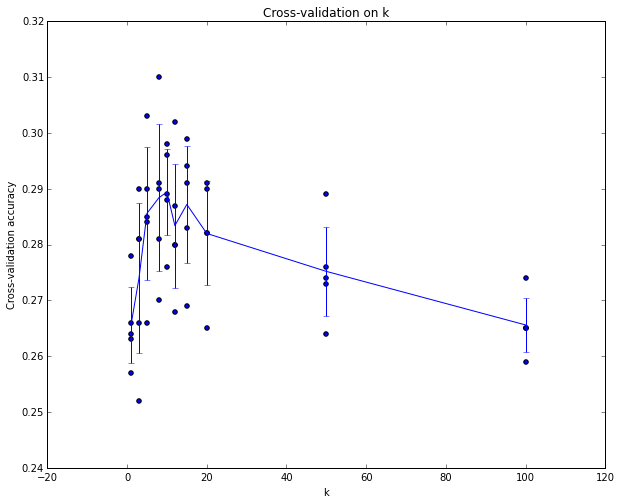

Example the graph suggest that a vlue higher is work best. In the graph mean is that K-7 is most better point. 
<br>
Splits depends on multiple factors. For example if the number of hyperparameters is large you may prefer to use bigger validation splits. If the number of examples in the validation set is small (perhaps only a few hundred or so), it is safer to use cross-validation. Typical number of folds you can see in practice would be 3-fold, 5-fold or 10-fold cross-validation. 

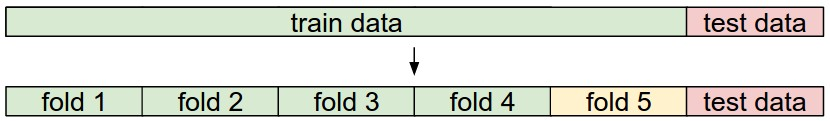

**Pros and Cons** <br>
Pros<br>
First, Nearest Neighbor is very simple to implement and understand.<br> 
Second,The classifier takes no time to train.<br>

Cons<br>
We pay that computational cost at test time, since classifying a test example requires a comparison to every single training example. but once the training is finished it is very cheap to classify a new test example. This mode of operation is much more desirable in practice. <br>
 One problem is that images are high-dimensional objects (i.e. they often contain many pixels), and distances over high-dimensional spaces can be very counter-intuitive. The image below illustrates the point that the pixel-based L2 similarities we developed above are very different from perceptual similarities:

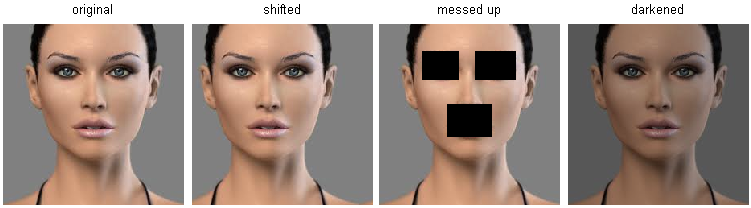

**ANN**
 the computational complexity of the Nearest Neighbor classifier is an active area of research, and several Approximate Nearest Neighbor (ANN) algorithms and libraries exist that can accelerate the nearest neighbor lookup in a dataset
  These algorithms allow one to trade off the correctness of the nearest neighbor retrieval with its space/time complexity during retrieval, and usually rely on a pre-processing/indexing stage that involves building a kdtree, or running the k-means algorithm.

<h1>Summary</h1>
In summary:


*   We introduced the problem of Image Classification, in which we are given a set of images that are all labeled with a single category. We are then asked to predict these categories for a novel set of test images and measure the accuracy of the predictions.
*   We introduced a simple classifier called the Nearest Neighbor classifier. We saw that there are multiple hyper-parameters (such as value of k, or the type of distance used to compare examples) that are associated with this classifier and that there was no obvious way of choosing them.
*   We saw that the correct way to set these hyperparameters is to split your training data into two: a training set and a fake test set, which we call validation set. We try different hyperparameter values and keep the values that lead to the best performance on the validation set.
*   If the lack of training data is a concern, we discussed a procedure called cross-validation, which can help reduce noise in estimating which hyperparameters work best.
*   Once the best hyperparameters are found, we fix them and perform a single evaluation on the actual test set.
*   We saw that Nearest Neighbor can get us about 40% accuracy on CIFAR-10. It is simple to implement but requires us to store the entire training set and it is expensive to evaluate on a test image.
*   Finally, we saw that the use of L1 or L2 distances on raw pixel values is not adequate since the distances correlate more strongly with backgrounds and color distributions of images than with their semantic content.



<br>






In next lectures we will embark on addressing these challenges and eventually arrive at solutions that give 90% accuracies, allow us to completely discard the training set once learning is complete, and they will allow us to evaluate a test image in less than a millisecond.


<h1>Summary: Applying kNN in practice</h1>
If you wish to apply kNN in practice (hopefully not on images, or perhaps as only a baseline) proceed as follows:


1.   Preprocess your data: Normalize the features in your data (e.g. one pixel in images) to have zero mean and unit variance. We will cover this in more detail in later sections, and chose not to cover data normalization in this section because pixels in images are usually homogeneous and do not exhibit widely different distributions, alleviating the need for data normalization.
2.   If your data is very high-dimensional, consider using a dimensionality reduction technique such as PCA (wiki ref, CS229ref, blog ref), NCA (wiki ref, blog ref), or even Random Projections.
3.   Split your training data randomly into train/val splits. As a rule of thumb, between 70-90% of your data usually goes to the train split. This setting depends on how many hyperparameters you have and how much of an influence you expect them to have. If there are many hyperparameters to estimate, you should err on the side of having larger validation set to estimate them effectively.
4.    If you are concerned about the size of your validation data, it is best to split the training data into folds and perform cross-validation. If you can afford the computational budget it is always safer to go with cross-validation (the more folds the better, but more expensive).
5.   Train and evaluate the kNN classifier on the validation data (for all folds, if doing cross-validation) for many choices of k (e.g. the more the better) and across different distance types (L1 and L2 are good candidates)
If your kNN classifier is running too long, consider using an Approximate Nearest Neighbor library (e.g. FLANN) to accelerate the retrieval (at cost of some accuracy).
6.   Take note of the hyperparameters that gave the best results. There is a question of whether you should use the full training set with the best hyperparameters, since the optimal hyperparameters might change if you were to fold the validation data into your training set (since the size of the data would be larger). In practice it is cleaner to not use the validation data in the final classifier and consider it to be burned on estimating the hyperparameters. Evaluate the best model on the test set. Report the test set accuracy and declare the result to be the performance of the kNN classifier on your data.






